In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
data= pd.read_csv(r"D:\codsoft dataset\advertising.csv")

In [7]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [8]:
data.shape

(200, 4)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [11]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [13]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

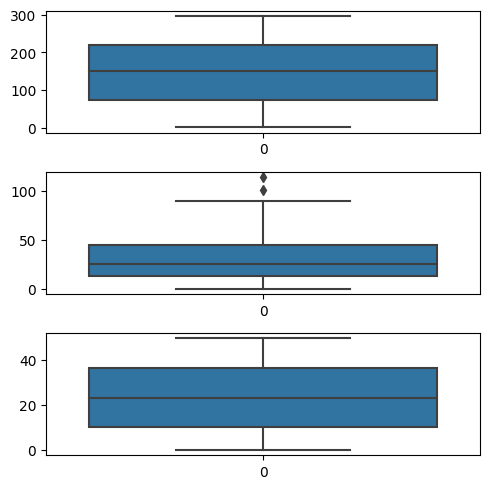

In [14]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(data['TV'], ax = axs[0])
plt2 = sns.boxplot(data['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(data['Radio'], ax = axs[2])
plt.tight_layout()

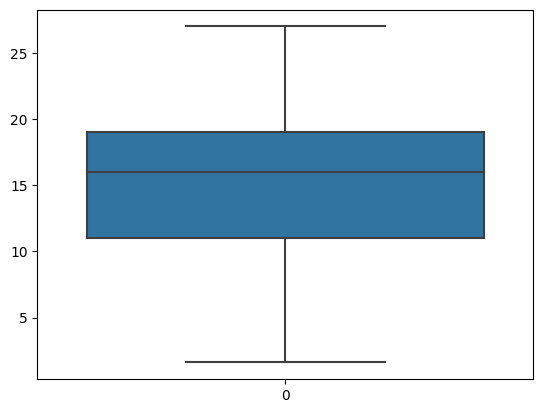

In [17]:
sns.boxplot(data["Sales"])
plt.show()

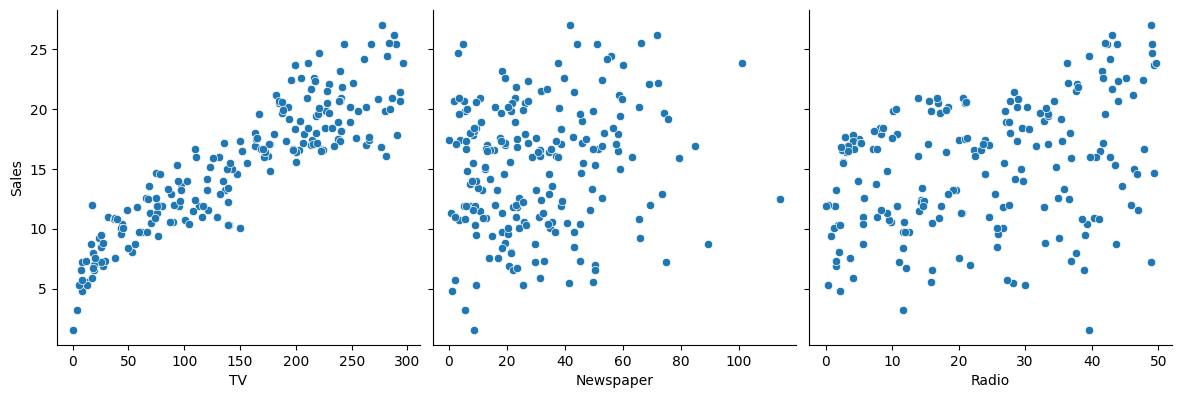

In [19]:
sns.pairplot(data,x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

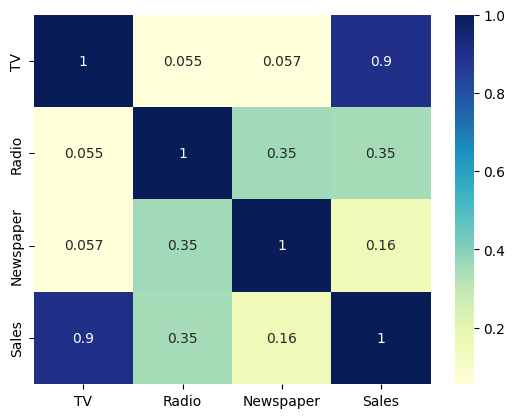

In [21]:
sns.heatmap(data.corr(),cmap='YlGnBu',annot=True)
plt.show()

In [22]:
X=data['TV']
y=data['Sales']

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size= 0.7,test_size=0.3,random_state=0)

In [25]:
X_train.head()

131    265.2
96     197.6
181    218.5
19     147.3
153    171.3
Name: TV, dtype: float64

In [26]:
y_train.head()

131    17.7
96     16.7
181    17.2
19     14.6
153    16.0
Name: Sales, dtype: float64

In [27]:
import statsmodels.api as sm

In [28]:
X_train_sm=sm.add_constant(X_train)
lr= sm.OLS(y_train,X_train_sm).fit()

In [29]:
lr.params

const    7.143822
TV       0.054732
dtype: float64

In [30]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     573.1
Date:                Thu, 11 Jul 2024   Prob (F-statistic):           5.56e-51
Time:                        20:05:27   Log-Likelihood:                -312.40
No. Observations:                 140   AIC:                             628.8
Df Residuals:                     138   BIC:                             634.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1438      0.400     17.838      0.0

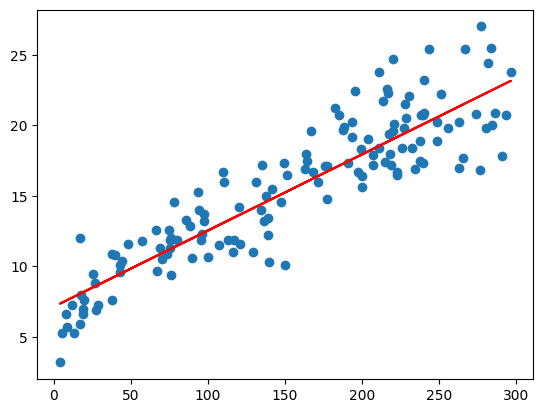

In [31]:
plt.scatter(X_train,y_train)
plt.plot(X_train, 0.054*X_train+7.143,'r')
plt.show()

In [32]:
y_train_pred=lr.predict(X_train_sm)
res=(y_train-y_train_pred)

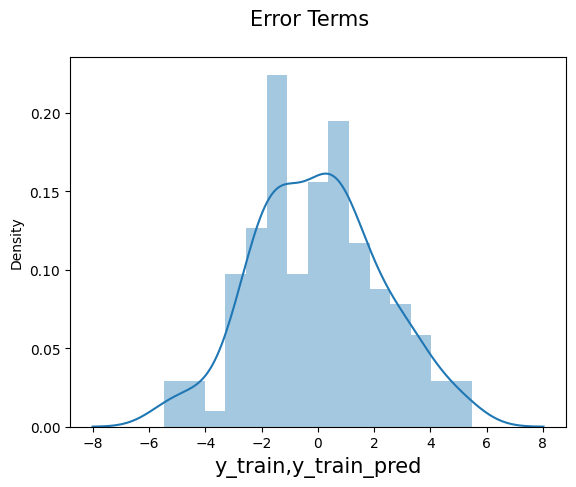

In [34]:
fig=plt.figure()
sns.distplot(res,bins=15)
fig.suptitle('Error Terms', fontsize = 15)
plt.xlabel('y_train,y_train_pred',fontsize=15)
plt.show()


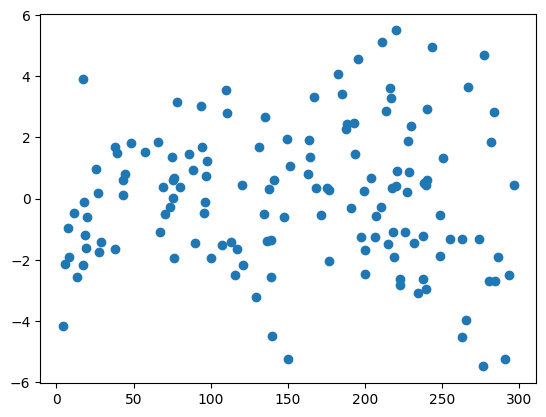

In [36]:
plt.scatter(X_train,res)
plt.show()

In [37]:
X_test_sm=sm.add_constant(X_test)
y_pred=lr.predict(X_test_sm)

In [38]:
y_pred.head()

18     10.931276
170     9.880422
107    12.091594
98     22.999681
177    16.459208
dtype: float64

In [39]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [40]:
np.sqrt(mean_squared_error(y_test,y_pred))

2.359987117224847

In [41]:
r_squared=r2_score(y_test,y_pred)
r_squared

0.8150168765722069

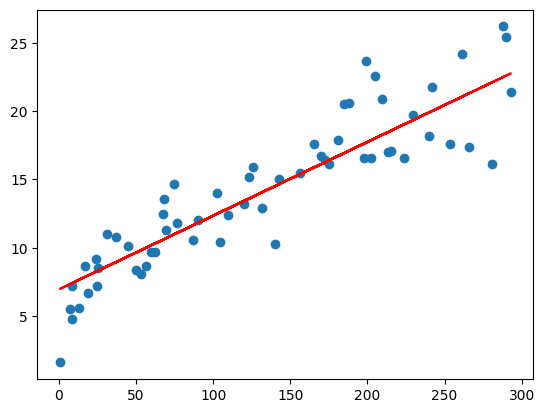

In [42]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()